# Proyecto 2
Todas las preguntas tienen el mismo peso en esta tarea. Esta tarea requiere más aprendizaje individual. Te invito a consultar la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/) para encontrar funciones o métodos que quizás no has usado aún, o realices preguntas en [Stack Overflow](https://stackoverflow.com/) y etiquételos como relacionados con pandas y python. Todas las preguntas tienen la misma cantidad de puntos, excepto la pregunta 1, que vale el 20 % de la calificación de la tarea.

**Nota**: A partir de la pregunta 2 se basan en la respuesta de la pregunta 1.

In [72]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings

warnings.filterwarnings('ignore')

### Pregunta 1
Cargue los datos de energía del archivo `assets/Energy Indicators.xls`, que es una lista de indicadores de [suministro de energía y producción de electricidad renovable](assets/Energy%20Indicators.xls) de las [Naciones Unidas](https://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) para el año 2013, y asigna esos datos a un DataFrame con el nombre de variable **energy**.

Ten en cuenta que este es un archivo de Excel y no un archivo de valores separados por comas (.csv). Además, asegúrate de excluir la información del pie de página y del encabezado del archivo de datos. Las primeras dos columnas son innecesarias, por lo que debes deshacerse de ellas. También debes cambiar las etiquetas de las columnas para que las columnas sean las siguientes:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convierta `Energy Supply` a gigajulios (**Nota: hay 1,000,000 giga julios en un petajulio**). Para todos los países que carezcan de datos (por ejemplo, datos con "..."), asegúrese de que estos reflejen valores `np.NaN`.

Cambia el nombre de los siguientes países según este listado (nos servirá para preguntas posteriores):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

También hay varios países que contienen paréntesis en su nombre. Asegúrete de eliminarlos, por ejemplo: `'Bolivia (Estado Plurinacional de)'` debería ser `'Bolivia'`.

A continuación, carga los datos del GDP (PBI) del archivo `assets/world_bank.csv`. Este es un archivo .csv del [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) que contiene el PBI de los países desde 1960 hasta 2015. Llame a este DataFrame **gdp**.

Asegúrete de omitir el encabezado y cambia el nombre de la siguiente lista de países:

```
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
```

Finalmente, lee el [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](https://www.scimagojr.com/countryrank.php?category=2102) desde el archivo `assets/scimagojr-3.xlsx`, que clasifica a los paises según sus contribuciones al área mencionada. Denomina este DataFrame con el nombre **sciamgo**.

Unifica los tres datasets: GDP, Energy, y ScimEn en un nuevo dataset (utilizando la intersección de los nombres de países). Utiliza solo los años del 2006 al 2015 de datos de GDP (PBI) y solo los 15 principales países según el ranking de Scimagojr 'Rank' (del 1 al 15).

El índice de este DataFrame debe ser el nombre de los países, y las columnas deben ser ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

*Esto debería devolver un DataFrame con 20 columnas y 15 entradas, y las filas del DataFrame deberían estar ordenadas por "Rank".*


In [73]:

energy_path = r'C:\Users\User\OneDrive\Escritorio\Facultad\Programación\Analisis de datos\Proyecto2-1-\assets\Energy Indicators.xls'
energy = pd.read_excel(energy_path, skiprows=17, skipfooter=38, usecols="C:F", header=None)
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.replace("...", np.nan, inplace=True)
energy['Energy Supply'] *= 1_000_000  

country_renames_energy = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_renames_energy)
energy['Country'] = energy['Country'].str.replace(r"\(.*\)", "", regex=True).str.strip()

gdp_path = r'C:\Users\User\OneDrive\Escritorio\Facultad\Programación\Analisis de datos\Proyecto2-1-\assets\world_bank.csv'
gdp = pd.read_csv(gdp_path, skiprows=4)
country_renames_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country Name'] = gdp['Country Name'].replace(country_renames_gdp)
gdp = gdp[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

sciamgo_path = r'C:\Users\User\OneDrive\Escritorio\Facultad\Programación\Analisis de datos\Proyecto2-1-\assets\scimagojr-3.xlsx'
sciamgo = pd.read_excel(sciamgo_path)
top_15_sciamgo = sciamgo[sciamgo['Rank'] <= 15]

df_merged = pd.merge(top_15_sciamgo, energy, on='Country', how='inner')
df_merged = pd.merge(df_merged, gdp, on='Country', how='inner')

if len(df_merged) < 15:
    df_merged_outer = pd.merge(top_15_sciamgo, energy, on='Country', how='outer')
    df_merged_outer = pd.merge(df_merged_outer, gdp, on='Country', how='outer')

    df_merged = df_merged_outer[df_merged_outer['Country'].isin(top_15_sciamgo['Country'])]

df = df_merged.set_index('Country')
df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
         'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
         '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df = df.sort_values(by='Rank')

print(df)



                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                1.0   127050.0           126767.0   597237.0   
United States        2.0    96661.0            94747.0   792274.0   
Japan                3.0    30504.0            30287.0   223024.0   
United Kingdom       4.0    20944.0            20357.0   206091.0   
Russian Federation   5.0    18534.0            18301.0    34266.0   
Canada               6.0    17899.0            17620.0   215003.0   
Germany              7.0    17027.0            16831.0   140566.0   
India                8.0    15005.0            14841.0   128763.0   
France               9.0    13153.0            12973.0   130632.0   
South Korea         10.0    11983.0            11923.0   114675.0   
Italy               11.0    10964.0            10794.0   111850.0   
Spain               12.0     9428.0             9330.0   123336.0   
Iran                13.0     8896.

### Pregunta 2
La pregunta anterior unió tres datasets y luego los redujo a las 15 entradas principales. Pero antes de reducirlos a los 15 elementos principales, ¿cuántas entradas se perdieron?

*Esta función debería devolver un solo número.*

In [74]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Todo menos esto!</text>
</svg>

In [75]:
paises_intersectados = pd.merge(pd.merge(energy, gdp, on='Country'), sciamgo, on='Country')
total_paises_antes_de_reducir = len(paises_intersectados)

total_paises_despues_de_reducir = 15

entradas_perdidas = total_paises_antes_de_reducir - total_paises_despues_de_reducir
entradas_perdidas


127

### Pregunta 3
¿Cuáles son los 15 países con mayor GDP (PBI) promedio en los últimos 10 años?

*Esta función debería devolver una serie llamada `avgGDP` con 15 países y su GDP (PBI) promedio ordenado en orden descendente.*

In [76]:
gdp_columns = [str(year) for year in range(2006, 2016)]
df['avgGDP'] = df[gdp_columns].mean(axis=1)

avgGDP = df['avgGDP'].nlargest(15)

avgGDP


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Pregunta 4
¿Cuánto cambió el GDP (PBI) durante el lapso de 10 años para el país con el sexto GDP (PBI) promedio más grande?

*Esta función debería devolver un solo número.*

In [77]:
sexto_pais = avgGDP.index[5] 

gdp_cambio = df.loc[sexto_pais, '2015'] - df.loc[sexto_pais, '2006']

gdp_cambio


np.float64(246702696075.3999)

### Pregunta 5
¿Cuál es el suministro medio de energía per cápita (`Energy Supply per Capita`)?

*Esta función debería devolver un solo número.*

In [78]:
suministro_medio_energia_per_capita = df['Energy Supply per Capita'].mean()

suministro_medio_energia_per_capita


np.float64(157.14285714285714)

### Pregunta 6
¿Qué país tiene el máximo `% Renewable` y cuál es el porcentaje?

*Esta función debe devolver una tupla con el nombre del país y el porcentaje.*

In [79]:
pais_max_renewable = df['% Renewable'].idxmax()
porcentaje_max_renewable = df['% Renewable'].max()

resultado = (pais_max_renewable, porcentaje_max_renewable)

resultado


('Brazil', 69.64803)

### Pregunta 7
Cree una nueva columna que sea la relación entre `Self-Citations` y `Total Citations`.
¿Cuál es el valor máximo para esta nueva columna y qué país tiene la relación más alta?

*Esta función debe devolver una tupla con el nombre del país y el ratio (proporción).*

In [80]:
df['Citations Ratio'] = df['Self-citations'] / df['Citations']

pais_max_ratio = df['Citations Ratio'].idxmax()
valor_max_ratio = df['Citations Ratio'].max()

resultado = (pais_max_ratio, valor_max_ratio)

resultado


('China', np.float64(0.6893126179389422))

### Pregunta 8

Crea una columna que estime la población utilizando `Energy Supply` y `Energy Supply per capita`.
¿Cuál es el tercer país más poblado según esta estimación?

*Esta función debería devolver el nombre del país*

In [81]:
df['Poblacion Estimada'] = df['Energy Supply'] / df['Energy Supply per Capita']

tercer_pais_mas_poblado = df['Poblacion Estimada'].sort_values(ascending=False).index[2]

tercer_pais_mas_poblado


'Russian Federation'

### Pregunta 9
Crea una columna que estime el número de `Citable documents` por persona.
¿Cuál es la correlación entre el número de `Citable documents` per cápita y el `Energy Supply per Capita`? Utiliza el método `.corr()`, (correlación de Pearson).

*Esta función debería devolver un solo número.*

*(Opcional: utiliza la función `plot9()` para visualizar la relación entre el suministro de energía per cápita y los `Citable documents` per cápita)*

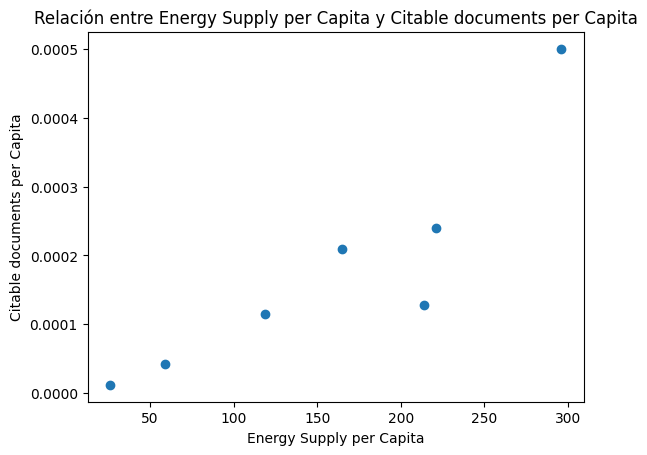

In [82]:
df['Poblacion Estimada'] = df['Energy Supply'] / df['Energy Supply per Capita']

df['Citable documents per Capita'] = df['Citable documents'] / df['Poblacion Estimada']

correlacion = df['Citable documents per Capita'].corr(df['Energy Supply per Capita'])

correlacion

import matplotlib.pyplot as plt

def plot9():
    plt.scatter(df['Energy Supply per Capita'], df['Citable documents per Capita'])
    plt.xlabel('Energy Supply per Capita')
    plt.ylabel('Citable documents per Capita')
    plt.title('Relación entre Energy Supply per Capita y Citable documents per Capita')
    plt.show()

plot9()    



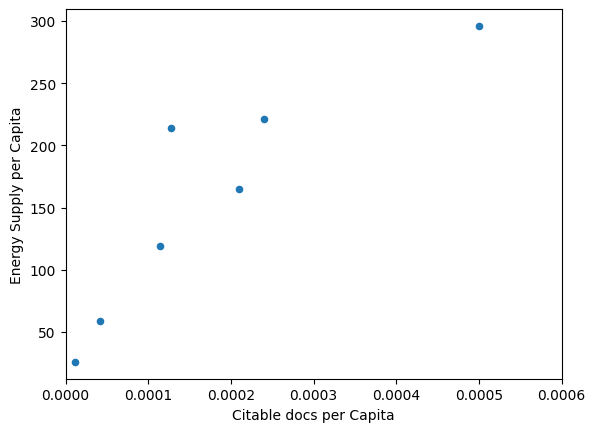

In [83]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    top15['PopEst'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable docs per Capita'] = top15['Citable documents'] / top15['PopEst']
    top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

### Pregunta 10
Crea una nueva columna con un valor igual a 1 si el valor de % de energía renovable del país (`% Renewable`) es igual o superior de la mediana de todos los países en el top 15, o con un valor igual a 0 si el valor de % de energía renovable del país (`% Renewable`) está por debajo de la mediana.

*Esta función debería devolver una serie llamada `HighRenew` cuyo índice es el nombre del país ordenado ascendentemente según el ranking.*

In [84]:
mediana_renewable = df['% Renewable'].median()

df['HighRenew'] = (df['% Renewable'] >= mediana_renewable).astype(int)

HighRenew = df['HighRenew'].sort_index()

HighRenew


Country
Australia             0
Brazil                1
Canada                1
China                 0
France                0
Germany               1
India                 0
Iran                  0
Italy                 0
Japan                 0
Russian Federation    1
South Korea           0
Spain                 0
United Kingdom        0
United States         0
Name: HighRenew, dtype: int64

### Pregunta 11
Utiliza el siguiente diccionario para agrupar los países por continente, luego crea un DataFrame que muestre el tamaño de la muestra (la cantidad de países en cada contenedor de continente) y la suma, la media y la desviación estándar para la población estimada de cada país.

```python
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}
```

*Esta función debería devolver un DataFrame con un índice llamado Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` y columnas `['size', 'sum', 'mean', 'std']`*

In [85]:
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}

df['Continent'] = df.index.map(continent_dict)

resultado = df.groupby('Continent')['Poblacion Estimada'].agg(['size', 'sum', 'mean', 'std'])

resultado


,size,sum,mean,std
Continent,,,,
Asia,5,1403611829.347123,467870609.782374,7.006261e+08
Australia,1,0,NaN,NaN
Europe,6,223869696.969697,111934848.484848,4.463987e+07
North America,2,35239864.864865,35239864.864865,NaN
South America,1,205915254.237288,205915254.237288,NaN


### Optional

Puedes ejecutar la función `plot_optional()` para ver un ejemplo de visualización.

Este es un ejemplo de visualización realizado para ayudarte a comprender los datos. 
Este es un gráfico de burbujas que muestra el % Renewable vs. Rank. 
El tamaño de la burbuja corresponde al GDP (PIB) de 2014 de los países, y el color corresponde al continente.


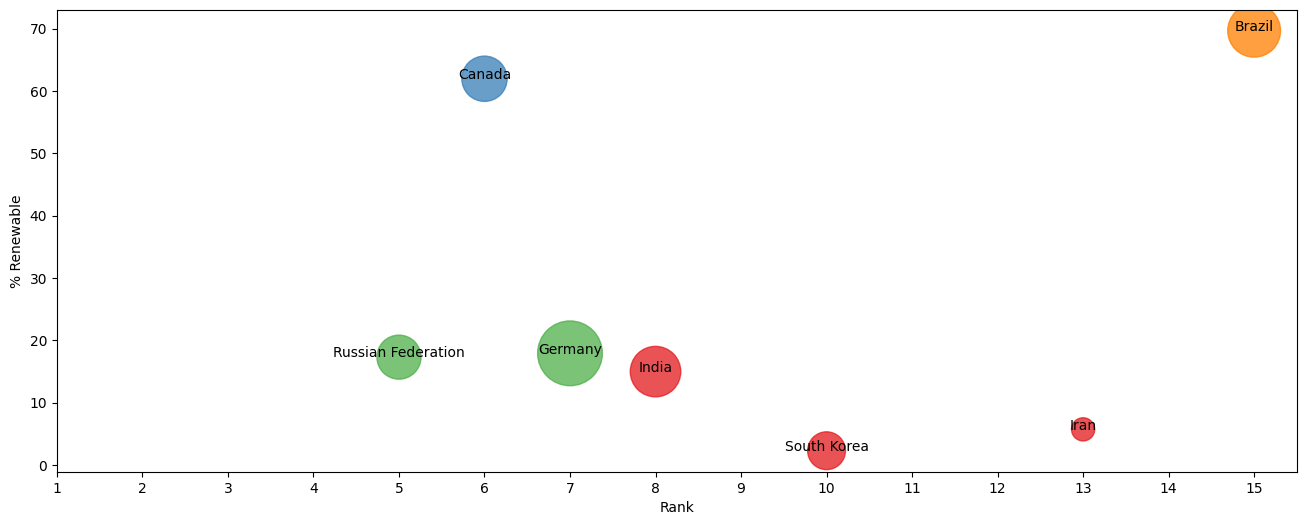

In [86]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    ax = top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c', '#377eb8', '#e41a1c', '#4daf4a',
                       '#4daf4a', '#377eb8', '#4daf4a', '#e41a1c',
                       '#4daf4a', '#e41a1c', '#4daf4a', '#4daf4a',
                       '#e41a1c', '#dede00', '#ff7f00'],
                    xticks=range(1, 16), s=6 * top15['2014'] / 10 ** 10,
                    alpha=.75, figsize=[16, 6])

    for i, txt in enumerate(top15.index):
        ax.annotate(txt, [top15['Rank'][i], top15['% Renewable'][i]], ha='center')

    print(
        """Este es un ejemplo de visualización realizado para ayudarte a comprender los datos. \nEste es un gráfico de burbujas que muestra el % Renewable vs. Rank. \nEl tamaño de la burbuja corresponde al GDP (PIB) de 2014 de los países, y el color corresponde al continente.""")


plot_optional()